# Preparation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# data processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import randint
from scipy.stats import uniform
# save model
import logging
import joblib
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# model
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef, balanced_accuracy_score, confusion_matrix

In [4]:
dirname = '/content/drive/MyDrive/Colab_Notebooks/Thesis/'
model_dirname = '/content/drive/MyDrive/Colab_Notebooks/Thesis/model/'
cleanedData_03 = pd.read_csv(dirname + 'cleanedData_03.csv')
cleanedData_03['dec'] = cleanedData_03['dec'].astype(int)
male_data = cleanedData_03[cleanedData_03['gender'] == 1]
female_data = cleanedData_03[cleanedData_03['gender'] == 0]

def split(data, name):
    train, val = train_test_split(data, stratify=data['dec'], random_state=123, test_size=0.4)
    val, test = train_test_split(val, stratify=val['dec'], random_state=123, test_size=0.5)
    train.to_csv(dirname + f'{name}_train.csv', index=False)
    val.to_csv(dirname + f'{name}_val.csv', index=False)
    test.to_csv(dirname + f'{name}_test.csv', index=False)
    print(train.shape, test.shape)
split(male_data, 'male')
split(female_data, 'female')

(2510, 48) (837, 48)
(2510, 48) (837, 48)


In [5]:
female_train = pd.read_csv(dirname + 'female_train.csv')
female_val = pd.read_csv(dirname + 'female_val.csv')
female_test = pd.read_csv(dirname + 'female_test.csv')
male_train = pd.read_csv(dirname + 'male_train.csv')
male_val = pd.read_csv(dirname + 'male_val.csv')
male_test = pd.read_csv(dirname + 'male_test.csv')

# Basic Model

In [6]:
# Calculate the number of negative and positive instances
neg_female = sum(female_train['dec'].values == 0)
pos_female = sum(female_train['dec'].values == 1)

# Calculate the ratio of negative to positive instances
scale_pos_weight_female = neg_female / pos_female
scale_pos_weight_female

1.737186477644493

In [7]:
# Calculate the number of negative and positive instances
neg_male = sum(male_train['dec'].values == 0)
pos_male = sum(male_train['dec'].values == 1)

# Calculate the ratio of negative to positive instances
scale_pos_weight_male = neg_male / pos_male
scale_pos_weight_male

1.1074727120067172

INFO:root:Fitting model: SVC
INFO:root:SVC hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 123, 'shrinking': True, 'tol': 0.001, 'verbose': False}
INFO:root:SVC MCC: 0.014901714312752612
INFO:root:SVC BACC: 0.5060097485321813


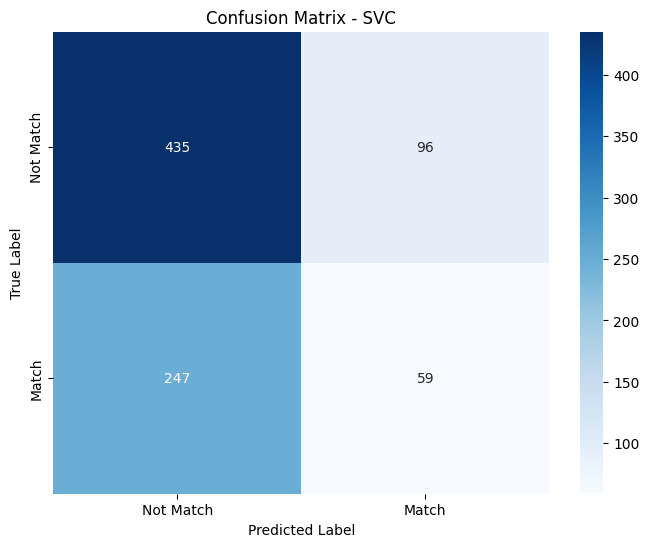

INFO:root:Fitting model: xgb
INFO:root:xgb hyperparameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 123, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1.737186477644493, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
INFO:root:xgb MCC: 0.2520417

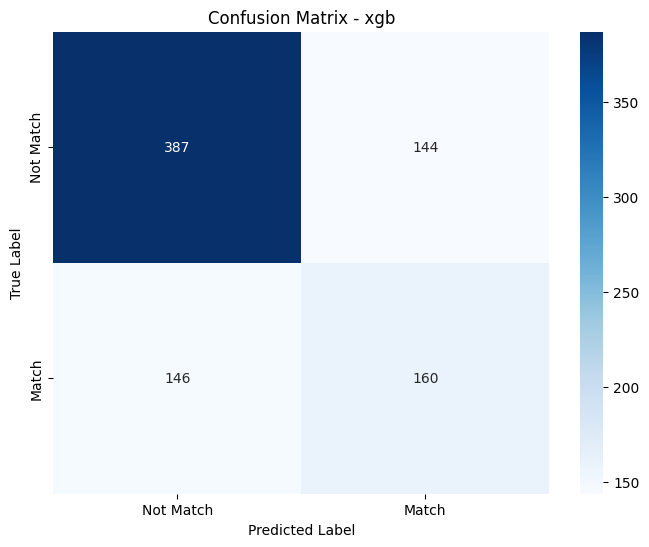

INFO:root:Fitting model: lgb
INFO:root:lgb hyperparameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'is_unbalance': True}


[LightGBM] [Info] Number of positive: 917, number of negative: 1593
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1533
[LightGBM] [Info] Number of data points in the train set: 2510, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365339 -> initscore=-0.552267
[LightGBM] [Info] Start training from score -0.552267


INFO:root:lgb MCC: 0.3134750447765801
INFO:root:lgb BACC: 0.6585244267198405


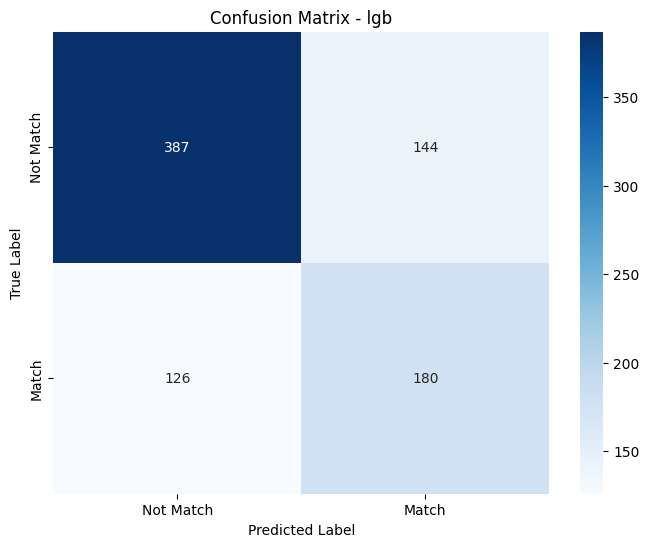

INFO:root:Fitting model: SVC
INFO:root:SVC hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 123, 'shrinking': True, 'tol': 0.001, 'verbose': False}
INFO:root:SVC MCC: 0.006440968093443063
INFO:root:SVC BACC: 0.5028903057428372


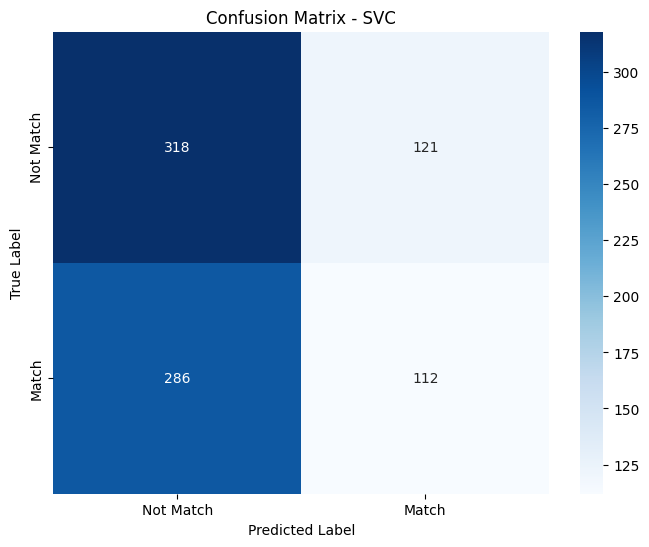

INFO:root:Fitting model: xgb
INFO:root:xgb hyperparameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 123, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1.1074727120067172, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
INFO:root:xgb MCC: 0.285332

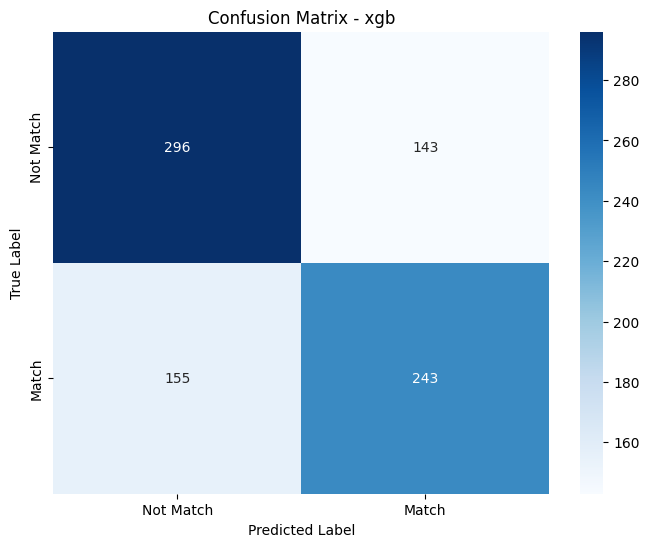

INFO:root:Fitting model: lgb
INFO:root:lgb hyperparameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'is_unbalance': True}
INFO:root:lgb MCC: 0.28342512461428454
INFO:root:lgb BACC: 0.6416192580213138


[LightGBM] [Info] Number of positive: 1191, number of negative: 1319
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1529
[LightGBM] [Info] Number of data points in the train set: 2510, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474502 -> initscore=-0.102081
[LightGBM] [Info] Start training from score -0.102081


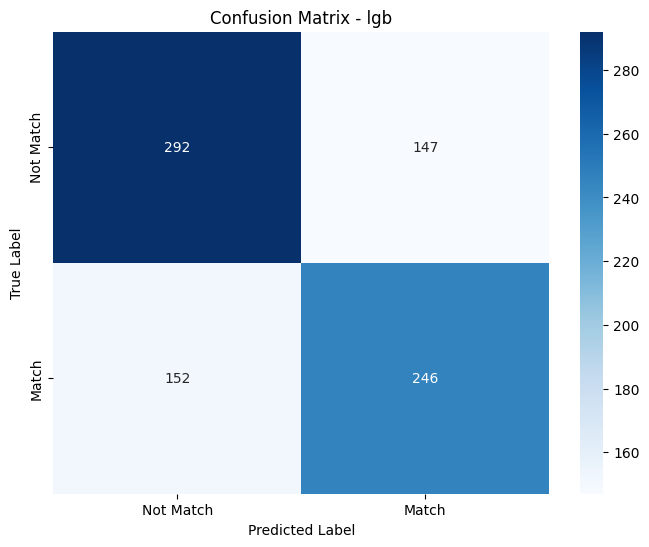

In [10]:
def model_fit(train, val, scale_pos_weight):

    logging.getLogger().setLevel(logging.INFO)
    # Create pipeline with the preprocessor and the model
    classifiers = {
        "SVC": SVC(random_state=123, class_weight='balanced'),
        "xgb": XGBClassifier(objective='binary:logistic', random_state=123, scale_pos_weight=scale_pos_weight),
        "lgb":LGBMClassifier(random_state=123, is_unbalance=True)
    }


    for name, classifier in classifiers.items():
        # Fit model
        logging.info(f"Fitting model: {name}")
        model = classifier.fit(train.drop('dec', axis = 1), train['dec'].values)
        y_pred = classifier.predict(val.drop('dec', axis = 1))
        hyperparameters = model.get_params()
        logging.info(f"{name} hyperparameters: {hyperparameters}")
        # Save the entire pipeline
        joblib.dump(model, f"{model_dirname}{name}.joblib")
        # metrics
        mcc = matthews_corrcoef(val['dec'].values, y_pred)
        bacc = balanced_accuracy_score(val['dec'].values, y_pred)
        logging.info(f"{name} MCC: {mcc}")
        logging.info(f"{name} BACC: {bacc}")
        # Draw confusion matrix
        cm = confusion_matrix(val['dec'].values, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Match', 'Match'], yticklabels=['Not Match', 'Match'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {name}')
        plt.savefig(f"{model_dirname}{name}.png")
        plt.show()
model_fit(female_train, female_val, scale_pos_weight_female)
model_fit(male_train, male_val, scale_pos_weight_male)

# Tuned

In [11]:
scorer = make_scorer(matthews_corrcoef)

## RF

### Female

In [ ]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 200),  # Randomly sample from the range [10, 200)
    'max_depth' : randint(3, 20),
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'bootstrap': [True,False]
}

# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = RandomForestClassifier(random_state=123, class_weight='balanced')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(female_train.drop('dec', axis = 1), female_train['dec'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for RandomForestClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(female_val.drop('dec', axis = 1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(female_val['dec'].values, y_pred)
accuracy = accuracy_score(female_val['dec'].values, y_pred)
f1 = f1_score(female_val['dec'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Best hyperparameters for RandomForestClassifier: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 168}
Validation Set Metrics:
MCC: 0.33358471025515735
Accuracy: 0.6989247311827957
F1-score: 0.5578947368421052


### Male

In [ ]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 200),  # Randomly sample from the range [10, 200)
    'max_depth' : randint(3, 20),
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'bootstrap': [True,False]
}

# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = RandomForestClassifier(random_state=123, class_weight='balanced')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(male_train.drop('dec', axis = 1), male_train['dec'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for RandomForestClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(male_val.drop('dec', axis = 1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(male_val['dec'].values, y_pred)
accuracy = accuracy_score(male_val['dec'].values, y_pred)
f1 = f1_score(male_val['dec'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Best hyperparameters for RandomForestClassifier: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 149}
Validation Set Metrics:
MCC: 0.3105105658243304
Accuracy: 0.6559139784946236
F1-score: 0.64


## XGB

### Female

In [12]:
# Define the parameter distribution for RandomizedSearchCV
param_grid = {
    'n_estimators': np.arange(100, 201, 50),
    'max_depth': np.arange(3, 10, 1),
    'eta': np.arange(0.01, 0.20, 0.02),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.arange(0.001, 1.0, 0.1),
    'reg_lambda': np.arange(0.001, 1.0, 0.1),
    'gamma': np.arange(0, 1.1, 0.2)
}

# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = XGBClassifier(objective='binary:logistic', random_state=123, scale_pos_weight=scale_pos_weight_female)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(female_train.drop('dec', axis = 1), female_train['dec'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for XGBClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(female_val.drop('dec', axis = 1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(female_val['dec'].values, y_pred)
bacc = balanced_accuracy_score(female_val['dec'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"BACC: {bacc}")

Best hyperparameters for XGBClassifier: {'subsample': 0.8999999999999999, 'reg_lambda': 0.501, 'reg_alpha': 0.501, 'n_estimators': 200, 'max_depth': 6, 'gamma': 0.4, 'eta': 0.03, 'colsample_bytree': 0.7}
Validation Set Metrics:
MCC: 0.30130938830181103
BACC: 0.6528747092057162


### Male

In [23]:
# Define the parameter distribution for RandomizedSearchCV
param_grid = {
    'n_estimators': np.arange(100, 201, 50),
    'max_depth': np.arange(3, 10, 1),
    'eta': np.arange(0.01, 0.20, 0.02),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.arange(0.001, 1.0, 0.1),
    'reg_lambda': np.arange(0.001, 1.0, 0.1),
    'gamma': np.arange(0, 1.1, 0.2)
}

# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = XGBClassifier(objective='binary:logistic', random_state=123, scale_pos_weight=scale_pos_weight_male)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(male_train.drop('dec', axis = 1), male_train['dec'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for XGBClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(male_val.drop('dec', axis = 1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(male_val['dec'].values, y_pred)
bacc = balanced_accuracy_score(male_val['dec'].values, y_pred)
# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"BACC: {bacc}")

Best hyperparameters for XGBClassifier: {'subsample': 0.5, 'reg_lambda': 0.401, 'reg_alpha': 0.6010000000000001, 'n_estimators': 100, 'max_depth': 9, 'gamma': 0.4, 'eta': 0.01, 'colsample_bytree': 0.8999999999999999}
Validation Set Metrics:
MCC: 0.29845120279886656
BACC: 0.649274275706551


## GBM

### Female

In [ ]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': np.arange(0.01, 1, 0.02),
    'n_estimators':np.arange(100, 801, 50),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'criterion':['friedman_mse', 'squared_error'],
    'min_samples_split':np.arange(200, 1001, 200),
    'min_samples_leaf':np.arange(30, 101, 10),
    'max_depth': np.arange(3, 11, 1),


}
# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = GradientBoostingClassifier(random_state=123)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(female_train.drop('dec', axis = 1), female_train['dec'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for GradientBoostingClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(female_val.drop('dec', axis = 1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(female_val['dec'].values, y_pred)
accuracy = accuracy_score(female_val['dec'].values, y_pred)
f1 = f1_score(female_val['dec'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Best hyperparameters for GradientBoostingClassifier: {'subsample': 0.7999999999999999, 'n_estimators': 700, 'min_samples_split': 600, 'min_samples_leaf': 30, 'max_depth': 3, 'loss': 'log_loss', 'learning_rate': 0.5099999999999999, 'criterion': 'friedman_mse'}
Validation Set Metrics:
MCC: 0.28449191761144926
Accuracy: 0.6714456391875747
F1-score: 0.5393634840871022


### Male

In [ ]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': np.arange(0.01, 1, 0.02),
    'n_estimators':np.arange(100, 801, 50),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'criterion':['friedman_mse', 'squared_error'],
    'min_samples_split':np.arange(200, 1001, 200),
    'min_samples_leaf':np.arange(30, 101, 10),
    'max_depth': np.arange(3, 11, 1),


}
# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = GradientBoostingClassifier(random_state=123)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(male_train.drop('dec', axis = 1), male_train['dec'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for GradientBoostingClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(male_val.drop('dec', axis = 1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(male_val['dec'].values, y_pred)
accuracy = accuracy_score(male_val['dec'].values, y_pred)
f1 = f1_score(male_val['dec'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Best hyperparameters for GradientBoostingClassifier: {'subsample': 0.8999999999999999, 'n_estimators': 500, 'min_samples_split': 400, 'min_samples_leaf': 60, 'max_depth': 6, 'loss': 'exponential', 'learning_rate': 0.18999999999999997, 'criterion': 'squared_error'}
Validation Set Metrics:
MCC: 0.32805712067335463
Accuracy: 0.6654719235364397
F1-score: 0.6382428940568474


## LGB

### Female

In [22]:
param_grid = {
    'n_estimators':np.arange(100, 1001, 50),
    'num_leaves': np.arange(30, 50, 5),
    'learning_rate': np.arange(0.01, 0.21, 0.02),
    'max_depth': np.arange(3, 20, 1),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100, 150, 200],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100, 150, 200]
}
# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = LGBMClassifier(random_state=123, is_unbalance=True, verbose = -1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(female_train.drop('dec', axis = 1), female_train['dec'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for LGBMClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(female_val.drop('dec', axis = 1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(female_val['dec'].values, y_pred)
bacc = balanced_accuracy_score(female_val['dec'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"BACC: {bacc}")

Best hyperparameters for LGBMClassifier: {'reg_lambda': 10, 'reg_alpha': 0, 'num_leaves': 30, 'n_estimators': 800, 'max_depth': 7, 'learning_rate': 0.06999999999999999}
Validation Set Metrics:
MCC: 0.3231214921341884
BACC: 0.659632214467708


In [ ]:
param_grid = {
    'n_estimators': np.arange(100, 1001, 50),
    'num_leaves': np.arange(30, 50, 5),
    'learning_rate': np.arange(0.01, 0.21, 0.02),
    'max_depth': np.arange(3, 20, 1),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100, 150, 200],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100, 150, 200]
}

# Initialize the model
model = LGBMClassifier(random_state=123, is_unbalance=True, verbose=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit GridSearchCV to your data
grid_search.fit(female_train.drop('dec', axis=1), female_train['dec'].values)

# Retrieve the best hyperparameters
best_hyperparameters = grid_search.best_params_
print(f"Best hyperparameters for LGBMClassifier: {best_hyperparameters}")

# Get the best estimator from the GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(female_val.drop('dec', axis=1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(female_val['dec'].values, y_pred)
accuracy = accuracy_score(female_val['dec'].values, y_pred)
f1 = f1_score(female_val['dec'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

### Male

In [24]:
param_grid = {
    'n_estimators':np.arange(100, 501, 50),
    'num_leaves': np.arange(30, 50, 5),
    'learning_rate': np.arange(0.05, 0.21, 0.05),
    'max_depth': np.arange(3, 11, 1),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}
# Replace 'current_model_name' with the name of the model for which you want to perform random search
model = LGBMClassifier(random_state=123, is_unbalance=True, verbose = -1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring=scorer  # Scoring metric
)

# Fit RandomizedSearchCV to your data
random_search.fit(male_train.drop('dec', axis = 1), male_train['dec'].values)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters for LGBMClassifier: {best_hyperparameters}")

# Get the best estimator from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(male_val.drop('dec', axis = 1))

# Calculate evaluation metrics
mcc = matthews_corrcoef(male_val['dec'].values, y_pred)
bacc = balanced_accuracy_score(male_val['dec'].values, y_pred)

# Print the evaluation metrics
print(f"Validation Set Metrics:")
print(f"MCC: {mcc}")
print(f"BACC: {bacc}")

Best hyperparameters for LGBMClassifier: {'reg_lambda': 10, 'reg_alpha': 0, 'num_leaves': 45, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.15000000000000002}
Validation Set Metrics:
MCC: 0.34499932138728473
BACC: 0.6719359897437072


# Best

## Female

INFO:root:Fitting model: SVC
INFO:root:SVC hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 123, 'shrinking': True, 'tol': 0.001, 'verbose': False}
INFO:root:SVC MCC: 0.014551087830658525
INFO:root:SVC BACC: 0.5056220228204276


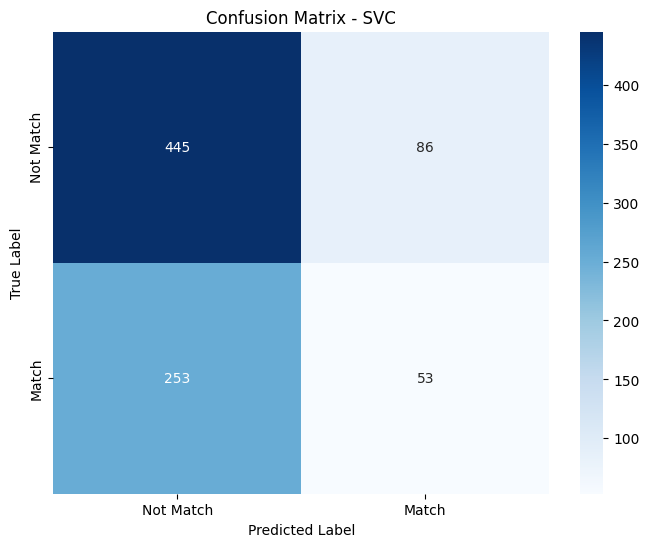

INFO:root:Fitting model: xgb
INFO:root:xgb hyperparameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.7, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.4, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 123, 'reg_alpha': 0.501, 'reg_lambda': 0.501, 'sampling_method': None, 'scale_pos_weight': 1.737186477644493, 'subsample': 0.8999999999999999, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'eta': 0.03}
INFO:

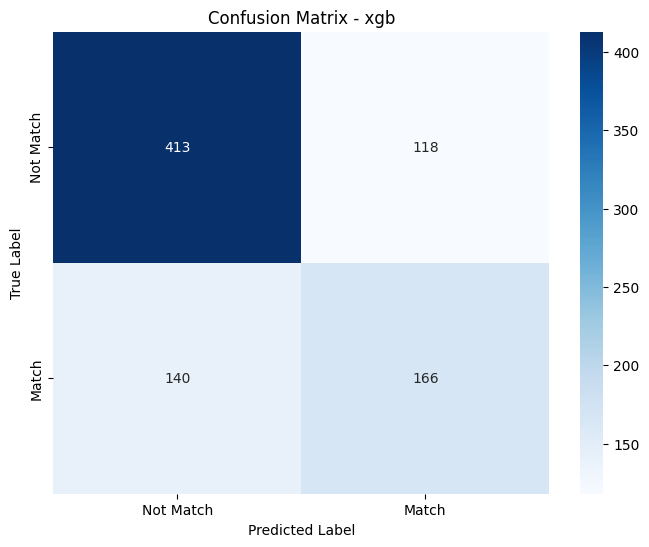

INFO:root:Fitting model: lgb


[LightGBM] [Info] Number of positive: 917, number of negative: 1593
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1533
[LightGBM] [Info] Number of data points in the train set: 2510, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365339 -> initscore=-0.552267
[LightGBM] [Info] Start training from score -0.552267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

INFO:root:lgb hyperparameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.06999999999999999, 'max_depth': 7, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 800, 'n_jobs': None, 'num_leaves': 30, 'objective': None, 'random_state': 123, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'is_unbalance': True}
INFO:root:lgb MCC: 0.33738462434620825
INFO:root:lgb BACC: 0.6632602193419741


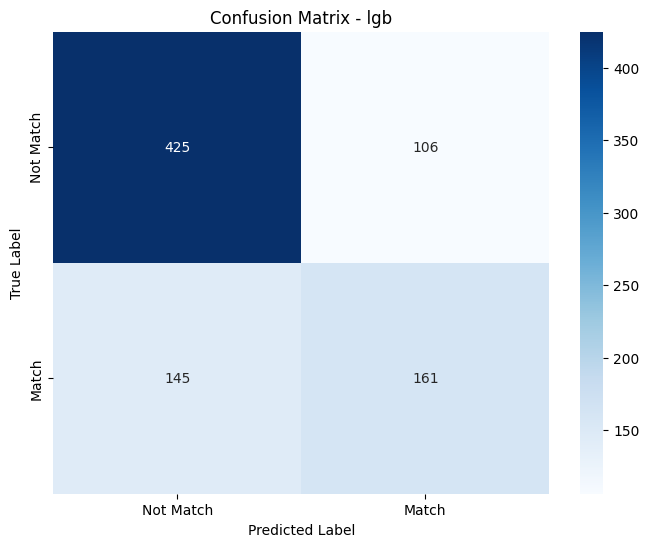

In [25]:
def model_fit_best_female():
    logging.getLogger().setLevel(logging.INFO)
    # Create pipeline with the preprocessor and the model
    classifiers = {
        "SVC": SVC(random_state=123, class_weight='balanced'),
        "xgb": XGBClassifier(objective='binary:logistic', random_state=123, scale_pos_weight=scale_pos_weight_female, subsample = 0.8999999999999999, reg_lambda = 0.501, reg_alpha = 0.501, n_estimators = 200, max_depth = 6, gamma = 0.4, eta = 0.03, colsample_bytree = 0.7),
        "lgb":LGBMClassifier(random_state=123, is_unbalance=True, reg_lambda = 10, reg_alpha = 0, num_leaves = 30, n_estimators = 800, max_depth = 7, learning_rate = 0.06999999999999999)
    }

    for name, classifier in classifiers.items():
        # Fit model
        logging.info(f"Fitting model: {name}")
        model = classifier.fit(female_train.drop('dec', axis = 1), female_train['dec'].values)
        y_pred = classifier.predict(female_test.drop('dec', axis = 1))
        hyperparameters = model.get_params()
        logging.info(f"{name} hyperparameters: {hyperparameters}")
        # Save the entire pipeline
        joblib.dump(model, f"{model_dirname}{name}.joblib")
        # metrics
        mcc = matthews_corrcoef(female_test['dec'].values, y_pred)
        bacc = balanced_accuracy_score(female_test['dec'], y_pred)
        logging.info(f"{name} MCC: {mcc}")
        logging.info(f"{name} BACC: {bacc}")
        # Draw confusion matrix
        cm = confusion_matrix(female_test['dec'], y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Match', 'Match'], yticklabels=['Not Match', 'Match'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {name}')
        plt.savefig(f"{model_dirname}{name}.png")
        plt.show()
model_fit_best_female()

## Male

INFO:root:Fitting model: SVC
INFO:root:SVC hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 123, 'shrinking': True, 'tol': 0.001, 'verbose': False}
INFO:root:SVC MCC: 0.038294567786000544
INFO:root:SVC BACC: 0.5167019693153194


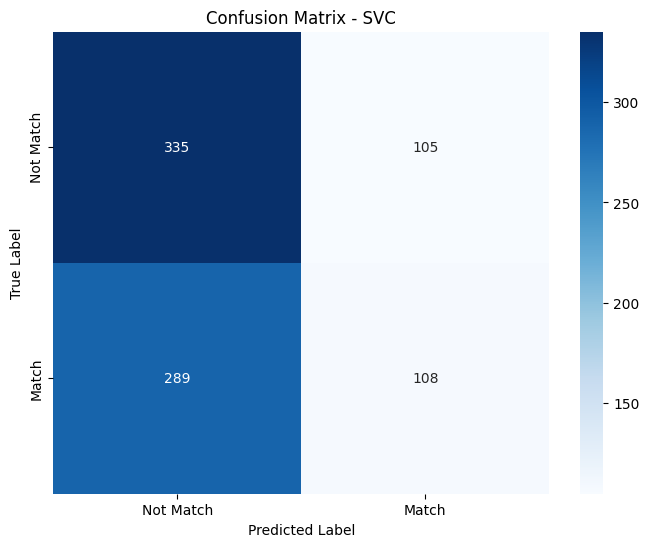

INFO:root:Fitting model: xgb
INFO:root:xgb hyperparameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8999999999999999, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.4, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 9, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 123, 'reg_alpha': 0.6010000000000001, 'reg_lambda': 0.401, 'sampling_method': None, 'scale_pos_weight': 1.1074727120067172, 'subsample': 0.5, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'eta

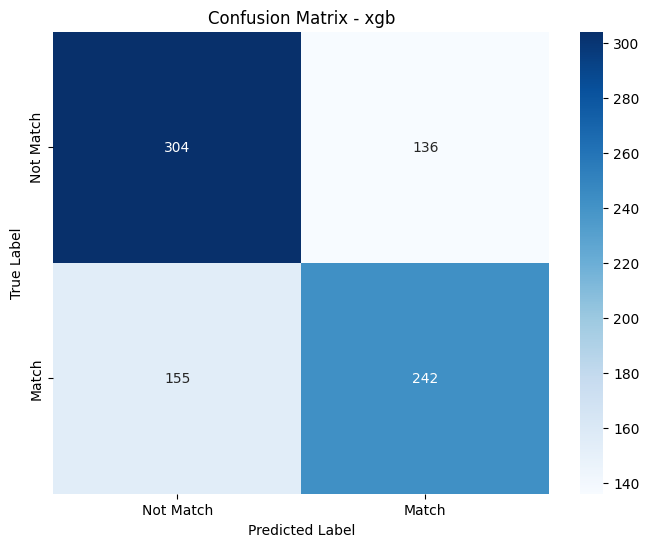

INFO:root:Fitting model: lgb


[LightGBM] [Info] Number of positive: 1191, number of negative: 1319
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1529
[LightGBM] [Info] Number of data points in the train set: 2510, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474502 -> initscore=-0.102081
[LightGBM] [Info] Start training from score -0.102081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

INFO:root:lgb hyperparameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.15000000000000002, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': None, 'num_leaves': 45, 'objective': None, 'random_state': 123, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'is_unbalance': True}
INFO:root:lgb MCC: 0.330176038695708
INFO:root:lgb BACC: 0.6643691321273185


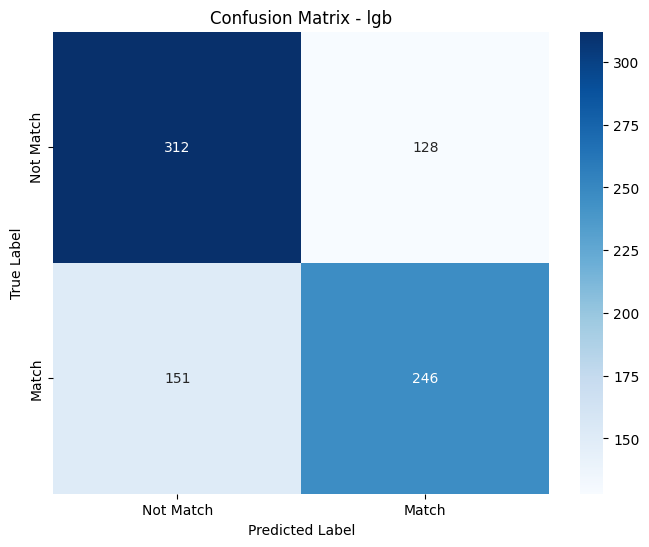

In [26]:
def model_fit_best_male():
    logging.getLogger().setLevel(logging.INFO)
    # Create pipeline with the preprocessor and the model
    classifiers = {
        "SVC": SVC(random_state=123, class_weight='balanced'),
        "xgb": XGBClassifier(objective='binary:logistic', random_state=123, scale_pos_weight=scale_pos_weight_male, subsample = 0.5, reg_lambda = 0.401, reg_alpha = 0.6010000000000001, n_estimators = 100, max_depth = 9, gamma = 0.4, eta = 0.01, colsample_bytree = 0.8999999999999999),
        "lgb":LGBMClassifier(random_state=123, is_unbalance=True, reg_lambda = 10, reg_alpha = 0, num_leaves = 45, n_estimators = 500, max_depth = 10, learning_rate = 0.15000000000000002)
    }

    for name, classifier in classifiers.items():
        # Fit model
        logging.info(f"Fitting model: {name}")
        model = classifier.fit(male_train.drop('dec', axis = 1), male_train['dec'].values)
        y_pred = classifier.predict(male_test.drop('dec', axis = 1))
        hyperparameters = model.get_params()
        logging.info(f"{name} hyperparameters: {hyperparameters}")
        # Save the entire pipeline
        joblib.dump(model, f"{model_dirname}{name}.joblib")
        # metrics
        mcc = matthews_corrcoef(male_test['dec'].values, y_pred)
        bacc = balanced_accuracy_score(male_test['dec'], y_pred)
        logging.info(f"{name} MCC: {mcc}")
        logging.info(f"{name} BACC: {bacc}")
        # Draw confusion matrix
        cm = confusion_matrix(male_test['dec'], y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Match', 'Match'], yticklabels=['Not Match', 'Match'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {name}')
        plt.savefig(f"{model_dirname}{name}.png")
        plt.show()
model_fit_best_male()